<a href="https://colab.research.google.com/github/ArfinShariar23/Airlines-Passenger-Satisfaction-using-Python-ML-/blob/main/Passenger_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [789]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [790]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [791]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA MINING/Satisfaction/edited_train.csv')

# **Preprocessing of Dataset 1**

In [792]:
dataset1.shape

(103904, 24)

In [793]:
dataset1.keys()

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## **Missing Value Handeling**

In [794]:
dataset1.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [795]:
#Missing Value Handle 
dataset1['Arrival Delay in Minutes'] = dataset1['Arrival Delay in Minutes'].replace(np.NaN,dataset1['Arrival Delay in Minutes'].mean())

In [796]:
dataset1.isnull().sum().sum()

0

## **LabelEncoding**

In [797]:
dataset1.select_dtypes("object").head(5)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [798]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
dataset1['Gender'] = l_encoder.fit_transform(dataset1['Gender'])
dataset1['Customer Type'] = l_encoder.fit_transform(dataset1['Customer Type'])
dataset1['Type of Travel'] = l_encoder.fit_transform(dataset1['Type of Travel'])
dataset1['Class'] = l_encoder.fit_transform(dataset1['Class'])
dataset1['satisfaction'] = l_encoder.fit_transform(dataset1['satisfaction'])

In [799]:
dataset1.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## **Dataset 1 Describe**

In [800]:
dataset1.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,37463.812252,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64856.500000,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97368.250000,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


# **Correlations Founding**

In [801]:
co_matrix = dataset1.corr()

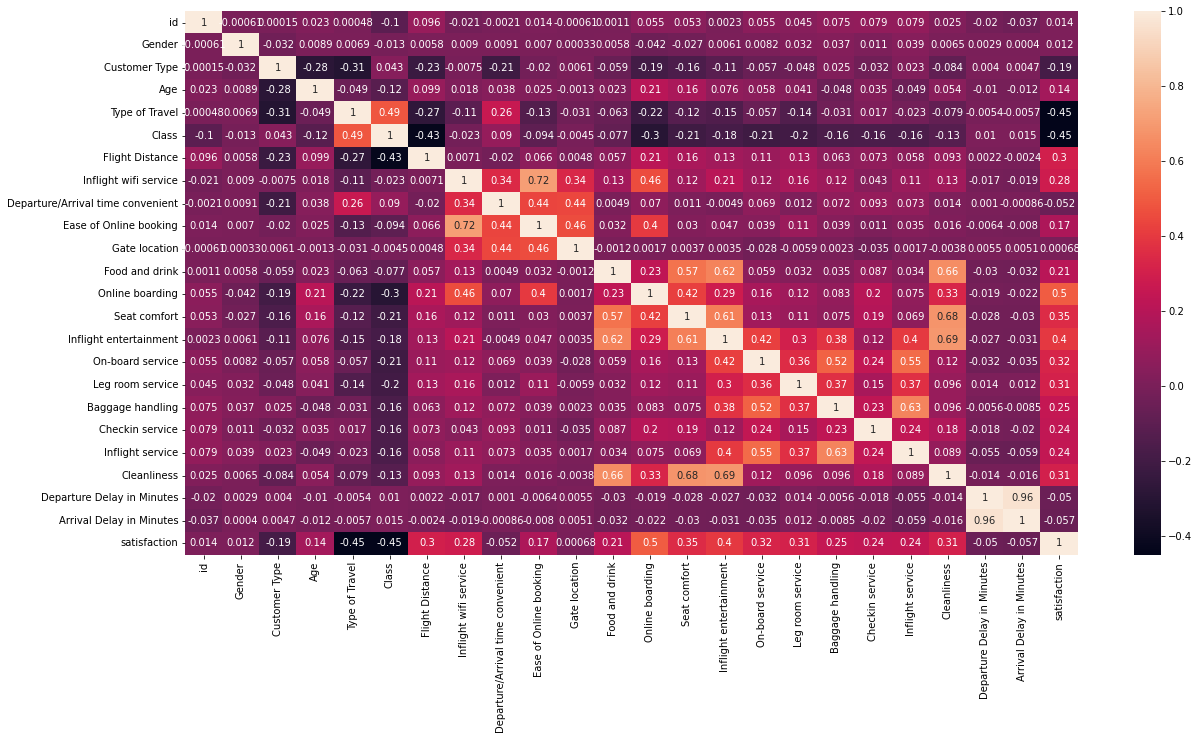

In [802]:
plt.figure(figsize = (20,10))
snb.heatmap(co_matrix,annot=True)

In [803]:
"""snb.pairplot(dataset1,hue ='satisfaction', vars =['Customer Type','Age', 'Type of Travel', 'Class',
 'Flight Distance', 'Inflight wifi service' ,'Ease of Online booking'])"""

"snb.pairplot(dataset1,hue ='satisfaction', vars =['Customer Type','Age', 'Type of Travel', 'Class',\n 'Flight Distance', 'Inflight wifi service' ,'Ease of Online booking'])"

In [804]:
co_matrix['satisfaction'].sort_values(ascending = False)

satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
id                                   0.013734
Gender                               0.012211
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057497
Customer Type                     

# **Recursive Feature Elimination (RFE)**

In [805]:
##spliting Dataset for rfe
x_rfe = dataset1.iloc[:,0:-1]
y_rfe = dataset1.iloc[:,-1]

In [806]:
x_rfe.keys()

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [807]:
y_rfe

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [808]:
from sklearn.model_selection import train_test_split

In [809]:
#spliting for train_test for RFE
x_train_rfe,x_test_rfe,y_train_rfe,y_test_rfe = train_test_split(x_rfe,y_rfe,test_size = 0.2,random_state=0)

In [810]:
#Using DecisionTree for RFE
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(splitter = 'random',max_depth=2)

In [811]:
from sklearn.feature_selection import RFE
from operator import itemgetter

rfe_select = RFE(model_dt,step = 1, n_features_to_select = 15)

In [812]:
rfe_select.fit(x_train_rfe,y_train_rfe)

RFE(estimator=DecisionTreeClassifier(max_depth=2, splitter='random'),
    n_features_to_select=15)

In [813]:
rfe_select.transform(x_train_rfe)

array([[ 1.,  2.,  1., ...,  2.,  0.,  0.],
       [ 1.,  2.,  5., ...,  4., 58., 30.],
       [ 2.,  4.,  2., ...,  1., 46., 44.],
       ...,
       [ 1.,  5.,  5., ...,  3.,  0.,  0.],
       [ 1.,  2.,  5., ...,  5.,  0.,  0.],
       [ 1.,  3.,  5., ...,  2.,  0.,  0.]])

In [814]:
rfe_pred = rfe_select.predict(x_test_rfe)

In [815]:
print(f'Feature Remaining After apply RFE: {rfe_select.n_features_}')

Feature Remaining After apply RFE: 15


Reassembeling Dataframe

In [816]:
rfe_drop_feature_index = np.where(rfe_select.support_ == False)

rfe_data = dataset1.drop(dataset1.columns[rfe_drop_feature_index], axis= 1)
rfe_main_data = pd.DataFrame(rfe_data, columns= rfe_data.keys())

In [817]:
rfe_main_data.shape

(103904, 16)

In [818]:
list(rfe_main_data.keys())

['Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Seat comfort',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

# **Univariate Apply**

In [819]:
#Spliting dataset for univariate
x_uni = rfe_main_data.iloc[:,0:-1]
y_uni = rfe_main_data.iloc[:,-1].copy()

In [820]:
#test_train_spliting for univariate
x_uni_train,x_uni_test,y_uni_train,y_uni_test = train_test_split(x_uni,y_uni,test_size=0.2,random_state=43)

In [821]:
#Applying SelecKBest for finding best feaures via univariate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [822]:
best_feature = SelectKBest(score_func=f_classif, k =10)
selected_features = best_feature.fit(x_uni_train,y_uni_train)
x_train_selected = selected_features.transform(x_uni_train)

In [823]:
print(f'Size of Test Data After apply SelectKBest: {x_train_selected.shape}')

Size of Test Data After apply SelectKBest: (83123, 10)


Dataframe Reassembleing Again

In [824]:
selected_feature_name = list(rfe_main_data.columns.values)

mask = best_feature.get_support()
main_feature = []

for b, f in zip(mask, selected_feature_name):
  if b:
    main_feature.append(f)

main_feature.append('satisfaction')

In [825]:
#Final DATA
final_data = pd.DataFrame(rfe_main_data, columns= main_feature)

In [826]:
final_data.head()

,Class,Inflight wifi service,Food and drink,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,2,3,5,5,4,3,4,4,5,5,0
1,0,3,1,1,1,5,3,1,4,1,0
2,0,2,5,5,4,3,4,4,4,5,1
3,0,2,2,2,2,5,3,1,4,2,0
4,0,3,4,5,3,4,4,3,3,3,1


In [827]:
final_data.shape

(103904, 11)

In [828]:
final_data.keys()

Index(['Class', 'Inflight wifi service', 'Food and drink', 'Seat comfort',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

# **Fiting our Model with selected Features**

in this section we are going Fiting our Dataset with selected features which we are find from after applying Recursive Feature Elimination and univariate.

**Spliting Dataset**

In [829]:
x = final_data.iloc[:,0:-1]
y = final_data.iloc[:,-1]

In [830]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

### **Applying Logistic Regression**

In [831]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [832]:
LR = LogisticRegression(random_state = 0)
LR.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [833]:
predict_LR = LR.predict(x_test)

In [834]:
predict_LR

array([1, 0, 0, ..., 1, 0, 0])

In [835]:
#Report of Logistic Regression
print('Report of Logistic Regression')
print('-----------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_LR))

Report of Logistic Regression
-----------------------------
Confusion Matrix: 
 [[9885 1885]
 [2073 6938]]


In [836]:
#Classification Report
print("Classification Report: \n",classification_report(y_test,predict_LR))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     11770
           1       0.79      0.77      0.78      9011

    accuracy                           0.81     20781
   macro avg       0.81      0.80      0.81     20781
weighted avg       0.81      0.81      0.81     20781



### **Applying RandomForestClassifier**

In [837]:
from sklearn.ensemble import RandomForestClassifier

In [838]:
rf = RandomForestClassifier(n_estimators=100)

In [839]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [840]:
predict_rf = rf.predict(x_test)

In [841]:
predict_rf

array([1, 0, 0, ..., 1, 0, 1])

In [842]:
#Report of RandomForestClassfier
print('Report of RandomForestClassfier')
print('-----------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_rf))

Report of RandomForestClassfier
-----------------------------
Confusion Matrix: 
 [[10917   853]
 [  925  8086]]


In [843]:
#Classification Report
print("Classification Report: \n",classification_report(y_test,predict_rf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     11770
           1       0.90      0.90      0.90      9011

    accuracy                           0.91     20781
   macro avg       0.91      0.91      0.91     20781
weighted avg       0.91      0.91      0.91     20781



### **Applying DecisionTree**

In [844]:
from sklearn.tree import DecisionTreeClassifier

In [845]:
dt = DecisionTreeClassifier()

In [846]:
dt = dt.fit(x_train,y_train)

In [847]:
predict_dt = dt.predict(x_test)

In [848]:
predict_dt

array([1, 0, 0, ..., 1, 0, 0])

In [849]:
#Report of DecisionTreeClassifier
print('Report of DecisionTreeClassfier')
print('-----------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_dt))

Report of DecisionTreeClassfier
-----------------------------
Confusion Matrix: 
 [[10814   956]
 [ 1094  7917]]


In [850]:
#Classification Report
print("Classification Report: \n",classification_report(y_test,predict_dt))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     11770
           1       0.89      0.88      0.89      9011

    accuracy                           0.90     20781
   macro avg       0.90      0.90      0.90     20781
weighted avg       0.90      0.90      0.90     20781



### **Applying KNN**

In [851]:
from sklearn.neighbors import KNeighborsClassifier

In [852]:
kn = KNeighborsClassifier()

In [853]:
kn = kn.fit(x_train,y_train)

In [854]:
predict_kn = kn.predict(x_test)

In [855]:
#Report of KNeighborsClassifier
print('Report of KNeighborsClassifier')
print('-----------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_kn))

Report of KNeighborsClassifier
-----------------------------
Confusion Matrix: 
 [[10943   827]
 [ 1314  7697]]


In [856]:
#Classification Report
print("Classification Report: \n",classification_report(y_test,predict_kn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     11770
           1       0.90      0.85      0.88      9011

    accuracy                           0.90     20781
   macro avg       0.90      0.89      0.89     20781
weighted avg       0.90      0.90      0.90     20781



### **Applying Naive Bayes (Gaussian)**

In [857]:
from sklearn.naive_bayes import GaussianNB

In [858]:
gnb = GaussianNB()

In [859]:
gnb.fit(x_train,y_train)

GaussianNB()

In [860]:
predict_gnb = gnb.predict(x_test)

In [861]:
#Report of GaussianNaiveBayes
print('Report of GaussianNaiveBayes')
print('-----------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,predict_gnb))

Report of GaussianNaiveBayes
-----------------------------
Confusion Matrix: 
 [[9279 2491]
 [1866 7145]]


In [862]:
#Classification Report
print("Classification Report: \n",classification_report(y_test,predict_gnb))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     11770
           1       0.74      0.79      0.77      9011

    accuracy                           0.79     20781
   macro avg       0.79      0.79      0.79     20781
weighted avg       0.79      0.79      0.79     20781



### **Accuracy Report of Model fiting**

In [863]:
#Accuracy Report
print(f"Accuracy for Logistic Regression: {round(accuracy_score(y_test,predict_LR) * 100, 2)}%\n") 
print(f"Accuracy for RandomForestClassifier: {round(accuracy_score(y_test,predict_rf) * 100, 2)}%\n")
print(f"Accuracy for DecisionTreeClassifier: {round(accuracy_score(y_test,predict_dt) * 100, 2)}%\n")
print(f"Accuracy for KNeighboClassifier: {round(accuracy_score(y_test,predict_kn) * 100, 2)}%\n")
print(f"Accuracy for GaussianNaiveBayes: {round(accuracy_score(y_test,predict_gnb) * 100, 2)}%\n")

Accuracy for Logistic Regression: 80.95%

Accuracy for RandomForestClassifier: 91.44%

Accuracy for DecisionTreeClassifier: 90.14%

Accuracy for KNeighboClassifier: 89.7%

Accuracy for GaussianNaiveBayes: 79.03%



Comparing Model using ROC Curve and AOC Score

In [864]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

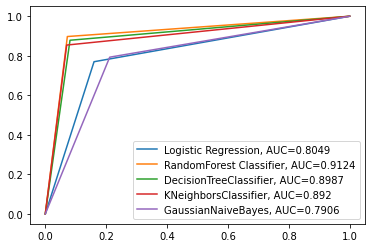

In [865]:

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
#fit logistic regression model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, predict_LR)
auc = round(metrics.roc_auc_score(y_test, predict_LR), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


#fit RandomForestClassifier model and plot ROC curve

f_pr,t_pr, _ = metrics.roc_curve(y_test,predict_rf) 
auc = round(metrics.roc_auc_score(y_test,predict_rf),4)
plt.plot(f_pr,t_pr,label='RandomForest Classifier, AUC='+str(auc))


#fit DecisionTreeClassifier model and plot ROC curve
f_pr1,t_pr1, _ = metrics.roc_curve(y_test,predict_dt) 
auc = round(metrics.roc_auc_score(y_test,predict_dt),4)
plt.plot(f_pr1,t_pr1,label='DecisionTreeClassifier, AUC='+str(auc))


#fit KNN model and plot ROC curve
f_pr2,t_pr2, _ = metrics.roc_curve(y_test,predict_kn) 
auc = round(metrics.roc_auc_score(y_test,predict_kn),4)
plt.plot(f_pr2,t_pr2,label='KNeighborsClassifier, AUC='+str(auc))

#fit GaussianNaiveBayes model and plot ROC curve
f_pr3,t_pr3, _ = metrics.roc_curve(y_test,predict_gnb) 
auc = round(metrics.roc_auc_score(y_test,predict_gnb),4)
plt.plot(f_pr3,t_pr3,label='GaussianNaiveBayes, AUC='+str(auc))


#add legend
plt.legend()

## **Import Second Dataset**

In [866]:
dataset2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA MINING/Satisfaction/edited_test.csv')

LabelEncoding

In [867]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
dataset2['Type of Travel'] = l_encoder.fit_transform(dataset2['Type of Travel'])
dataset2['satisfaction'] = l_encoder.fit_transform(dataset2['satisfaction'])
dataset2['Class'] = l_encoder.fit_transform(dataset2['Class'])

**Common Attribute Search**

In [868]:
#Common Attribute
def common(a, b):
  return list(set(a) & set(b))

In [869]:
final_data_attr = list(final_data.keys())
outer_data_attr = list(dataset2.keys())

In [870]:
common_attr = common(final_data_attr, outer_data_attr)

In [871]:
len(common_attr)

11

**Missing Attribute Handle**

In [872]:
add_attr = list(set(list(x_train.keys())) - set(common_attr))

common_attr.extend(add_attr)

In [873]:
common_attr

['On-board service',
 'Class',
 'Leg room service',
 'Food and drink',
 'Checkin service',
 'Inflight wifi service',
 'Baggage handling',
 'Inflight service',
 'Seat comfort',
 'Cleanliness',
 'satisfaction']

**DATAFRAME**

In [874]:
test_data = pd.DataFrame(dataset2,columns= common_attr)

In [875]:
test_data.head()

,On-board service,Class,Leg room service,Food and drink,Checkin service,Inflight wifi service,Baggage handling,Inflight service,Seat comfort,Cleanliness,satisfaction
0,5,1,5,3,2,5,5,5,3,5,1
1,4,0,4,5,3,1,4,4,5,5,1
2,4,1,1,2,2,2,3,2,2,2,0
3,1,0,1,3,3,0,1,1,4,4,1
4,2,1,2,4,4,2,2,2,2,4,1


**Filling Missing Values**

In [876]:
test_data.isnull().sum()

On-board service         0
Class                    0
Leg room service         0
Food and drink           0
Checkin service          0
Inflight wifi service    0
Baggage handling         0
Inflight service         0
Seat comfort             0
Cleanliness              0
satisfaction             0
dtype: int64

No Missing value Found

### **Spliting Dataset 2**

In [877]:
x_test_data = dataset2.iloc[:,0:-1]
y_test_data = dataset2.iloc[:,-1]

In [878]:
x_test_data = x_test_data.reindex(x_train.columns, axis= 1)

Fitting Logistic Regression For Dataset2

In [879]:
LR_predict_dt2 = LR.predict(x_test_data)
LR_dt2_accuracy = metrics.accuracy_score(y_test_data, LR_predict_dt2)

In [880]:
print(f"Accuracy for Logistic Regression in Dataset1: {round(accuracy_score(y_test,predict_LR) * 100, 2)}%\n") 
print(f"Accuracy for Logistic Regression in Dataset2: {round(LR_dt2_accuracy * 100, 2)}%\n")

Accuracy for Logistic Regression in Dataset1: 80.95%

Accuracy for Logistic Regression in Dataset2: 80.51%



Fitting RandomForestClassifier for DATASET 2

In [881]:
rf_predict_dt2 = rf.predict(x_test_data)
rf_dt2_accuracy = metrics.accuracy_score(y_test_data,rf_predict_dt2)

In [882]:
print(f"Accuracy for RandomForestClassifier in Dataset1: {round(accuracy_score(y_test,predict_rf) * 100, 2)}%\n")
print(f"Accuracy for RandomForestClassifier in Dataset2: {round(rf_dt2_accuracy * 100, 2)}%\n")

Accuracy for RandomForestClassifier in Dataset1: 91.44%

Accuracy for RandomForestClassifier in Dataset2: 91.5%



Fitting DecisionTreeClassifier for DATASET 2

In [883]:
dtc_predict_dt2= dt.predict(x_test_data)
dtc_dt2_accuracy = metrics.accuracy_score(y_test_data,dtc_predict_dt2)

In [884]:
print(f"Accuracy for DecisionTreeClassifier in Dataset1: {round(accuracy_score(y_test,predict_dt) * 100, 2)}%\n")
print(f"Accuracy for RandomForestClassifier in Dataset2: {round(dtc_dt2_accuracy * 100, 2)}%\n")

Accuracy for DecisionTreeClassifier in Dataset1: 90.14%

Accuracy for RandomForestClassifier in Dataset2: 90.01%



Fitting KNN for Dataset 2

In [885]:
kn_predict_dt2 = kn.predict(x_test_data)
kn_dt2_accuracy = metrics.accuracy_score(y_test_data,kn_predict_dt2)

In [886]:
print(f"Accuracy for KNeighborsClassifier in Dataset1: {round(accuracy_score(y_test,predict_kn) * 100, 2)}%\n")
print(f"Accuracy for KNeighborsClassifier in Dataset2: {round(kn_dt2_accuracy * 100, 2)}%\n")

Accuracy for KNeighborsClassifier in Dataset1: 89.7%

Accuracy for KNeighborsClassifier in Dataset2: 89.35%



Fitting Gaussian Naive Bayes

In [887]:
gnb_predict_dt2 = gnb.predict(x_test_data)
gnb_dt2_accuracy = metrics.accuracy_score(y_test_data,gnb_predict_dt2)

In [888]:
print(f"Accuracy for GaussianNaiveBayes in Dataset2: {round(accuracy_score(y_test,predict_gnb) * 100, 2)}%\n")
print(f"Accuracy for GaussianNaiveBayes in Dataset2: {round(gnb_dt2_accuracy * 100, 2)}%\n")

Accuracy for GaussianNaiveBayes in Dataset2: 79.03%

Accuracy for GaussianNaiveBayes in Dataset2: 78.38%



In [941]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(20,7), 'figure.dpi':100})

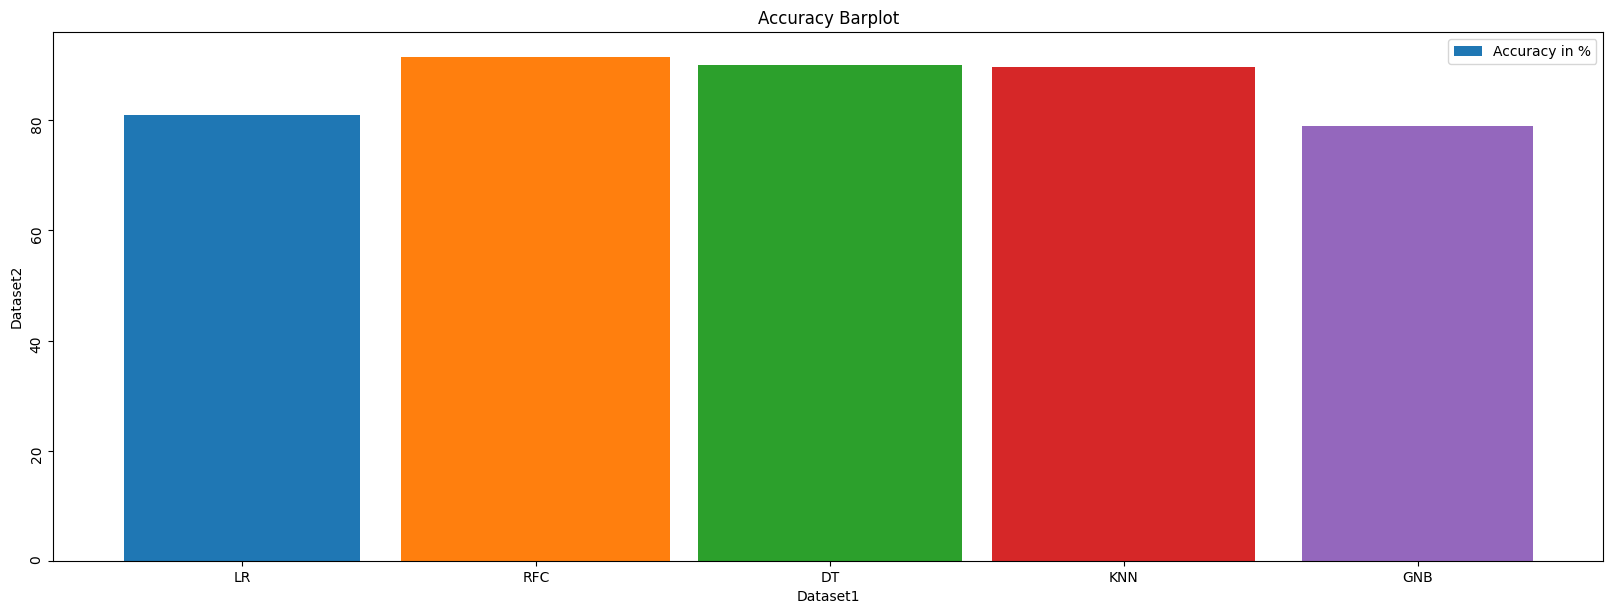

In [949]:
# Simple Bar Plot
plt.bar('LR',accuracy_score(y_test,predict_LR) * 100,LR_dt2_accuracy)
plt.bar('RFC',accuracy_score(y_test,predict_rf) * 100,rf_dt2_accuracy)
plt.bar('DT',accuracy_score(y_test,predict_dt) * 100,dtc_dt2_accuracy)
plt.bar('KNN',accuracy_score(y_test,predict_kn) * 100,kn_dt2_accuracy)
plt.bar('GNB',accuracy_score(y_test,predict_gnb) * 100,gnb_dt2_accuracy)

plt.yticks(rotation='vertical')

plt.xlabel('Dataset1')
plt.ylabel("Dataset2")
plt.title('Accuracy Barplot')
# Creating the legend of the bars in the plot
plt.legend(labels = ['Accuracy in %'])
plt.show()

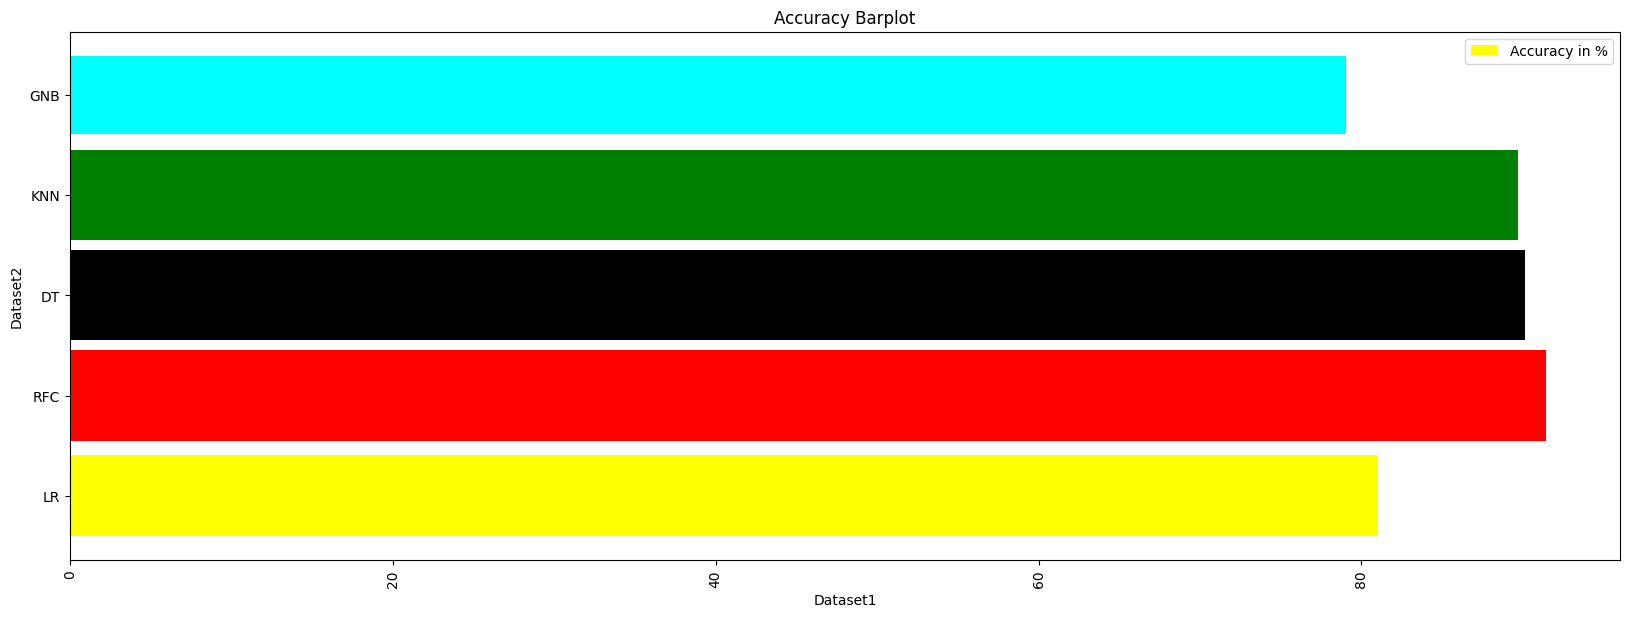

In [983]:
# Simple Bar Plot
plt.barh('LR',accuracy_score(y_test,predict_LR) * 100,LR_dt2_accuracy,color='yellow')
plt.barh('RFC',accuracy_score(y_test,predict_rf) * 100,rf_dt2_accuracy,color='red')
plt.barh('DT',accuracy_score(y_test,predict_dt) * 100,dtc_dt2_accuracy,color='black')
plt.barh('KNN',accuracy_score(y_test,predict_kn) * 100,kn_dt2_accuracy,color='green')
plt.barh('GNB',accuracy_score(y_test,predict_gnb) * 100,gnb_dt2_accuracy,color='cyan')

plt.xticks(rotation='vertical')


plt.xlabel('Dataset1')
plt.ylabel("Dataset2")
plt.title('Accuracy Barplot')
# Creating the legend of the bars in the plot
plt.legend(labels = ['Accuracy in %'])
plt.show()